In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
df=pd.read_csv('india_domestic_flights_2024.csv')

### Details of source dataset

In [3]:
# check for the shape of the data and viewing the fields included

print(f"The number of Rows & Columns in the source data: {df.shape}")

# Sample data

df.head()

The number of Rows & Columns in the source data: (32798, 15)


,Date,Airline,Flight_Type,Status,Available_Seats,Passengers,Distance_KM,Fuel_Burn_Liters,Expected_Departure,Expected_Arrival,Actual_Departure,Actual_Arrival,Operating_Expense,Departure_City,Arrival_City
0,2024-01-01,IndiGo,Domestic,Delayed,181,159,1140,3254,2024-01-01 10:30:00,2024-01-01 12:24:00,2024-01-01 11:35:00,2024-01-01 13:29:00,361257.10,Delhi,Mumbai
1,2024-01-01,IndiGo,Domestic,Delayed,185,164,1140,3175,2024-01-01 16:45:00,2024-01-01 18:39:00,2024-01-01 17:39:00,2024-01-01 19:33:00,330834.77,Delhi,Mumbai
2,2024-01-01,Air India,Domestic,Cancelled,211,176,1140,5912,2024-01-01 05:45:00,2024-01-01 07:39:00,NaN,NaN,485293.50,Delhi,Mumbai
3,2024-01-01,Air India,Domestic,On-Time,270,224,1140,3937,2024-01-01 08:30:00,2024-01-01 10:24:00,2024-01-01 08:30:00,2024-01-01 10:24:00,475747.43,Delhi,Mumbai
4,2024-01-01,Akasa Air,Domestic,On-Time,180,153,1140,3526,2024-01-01 14:45:00,2024-01-01 16:39:00,2024-01-01 14:45:00,2024-01-01 16:39:00,360317.84,Delhi,Mumbai


In [4]:
df.describe()

,Available_Seats,Passengers,Distance_KM,Fuel_Burn_Liters,Operating_Expense
count,32798.000000,32798.000000,32798.000000,32798.000000,32798.000000
mean,184.921337,156.916397,1409.572840,4685.280231,480793.167461
std,44.245210,37.820424,530.267485,2050.375298,191650.508982
min,80.000000,64.000000,700.000000,1890.000000,196027.920000
25%,180.000000,150.000000,840.000000,3147.000000,311118.587500
50%,184.000000,160.000000,1410.000000,4298.000000,456833.145000
75%,189.000000,165.000000,2070.000000,6180.000000,639936.907500
max,300.000000,254.000000,2200.000000,12099.000000,989878.100000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32798 entries, 0 to 32797
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                32798 non-null  object 
 1   Airline             32798 non-null  object 
 2   Flight_Type         32798 non-null  object 
 3   Status              32798 non-null  object 
 4   Available_Seats     32798 non-null  int64  
 5   Passengers          32798 non-null  int64  
 6   Distance_KM         32798 non-null  int64  
 7   Fuel_Burn_Liters    32798 non-null  int64  
 8   Expected_Departure  32798 non-null  object 
 9   Expected_Arrival    32798 non-null  object 
 10  Actual_Departure    30521 non-null  object 
 11  Actual_Arrival      30521 non-null  object 
 12  Operating_Expense   32798 non-null  float64
 13  Departure_City      32798 non-null  object 
 14  Arrival_City        32798 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.8

## Data Cleaning
 - Check for Null values
 - Format corrections
 - Drop unwanted columns

In [10]:
# Checking for Null values in the data set
pd.isnull(df).sum()

Date                     0
Airline                  0
Flight_Type              0
Status                   0
Available_Seats          0
Passengers               0
Distance_KM              0
Fuel_Burn_Liters         0
Expected_Departure       0
Expected_Arrival         0
Actual_Departure      2277
Actual_Arrival        2277
Operating_Expense        0
Departure_City           0
Arrival_City             0
dtype: int64

In [11]:
# Change data types

df['Actual_Arrival']=pd.to_datetime(df['Actual_Arrival'])
df['Actual_Departure']=pd.to_datetime(df['Actual_Departure'])
df['Date']=pd.to_datetime(df['Date'])

# Info after updates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32798 entries, 0 to 32797
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                32798 non-null  datetime64[ns]
 1   Airline             32798 non-null  object        
 2   Flight_Type         32798 non-null  object        
 3   Status              32798 non-null  object        
 4   Available_Seats     32798 non-null  int64         
 5   Passengers          32798 non-null  int64         
 6   Distance_KM         32798 non-null  int64         
 7   Fuel_Burn_Liters    32798 non-null  int64         
 8   Expected_Departure  32798 non-null  object        
 9   Expected_Arrival    32798 non-null  object        
 10  Actual_Departure    30521 non-null  datetime64[ns]
 11  Actual_Arrival      30521 non-null  datetime64[ns]
 12  Operating_Expense   32798 non-null  float64       
 13  Departure_City      32798 non-null  object    

## Adding additional attributes & updating formats for date fields
- Duration: difference between Actual Arrival & Departure
- Add Month and Year based on the date of the flight
- Add a columns to calculate RPK, ASK, Fuel Efficiency, Cost Efficiency (CASM), Load Factor

In [17]:
# calculating Duration of the flight

df['Duration']=(df['Actual_Arrival']-df['Actual_Departure']).dt.total_seconds()
df['Duration']=df['Duration']/3600

In [19]:
# Adding the Month and Year for the Date of flight

df['Month_Name'] = df['Date'].dt.strftime('%-m.%b')
df['Year'] = df['Date'].dt.year
df['Month_Year'] = df['Date'].dt.strftime('%b-%y')

In [21]:
# Add KPI Metrics RPK, ASK, Load_Factor, Fuel Efficiency, CASM, Occupancy

# Revenue Passenger Kilometers (RPK), Available Seat Kilometers (ASK) & Load Factor
df['RPK']=df['Passengers']*df['Distance_KM']
df['ASK']=df['Available_Seats']*df['Distance_KM']
df['Load_Factor']=df['RPK']/df['ASK']

# Calculating Fuel Efficiency
df['Fuel_Efficiency']=df['RPK']/df['Fuel_Burn_Liters']

# Cost per Available Seat Mile (CASM)
df['CASM']=df['Operating_Expense']/df['Available_Seats']

# Percentage of Seats available
df['Occupancy']=(df['Passengers']/df['Available_Seats'])*100

In [25]:
print(f"{df['Occupancy'].mean()}%")

84.71401028012785%


## Exploratory Data Analysis

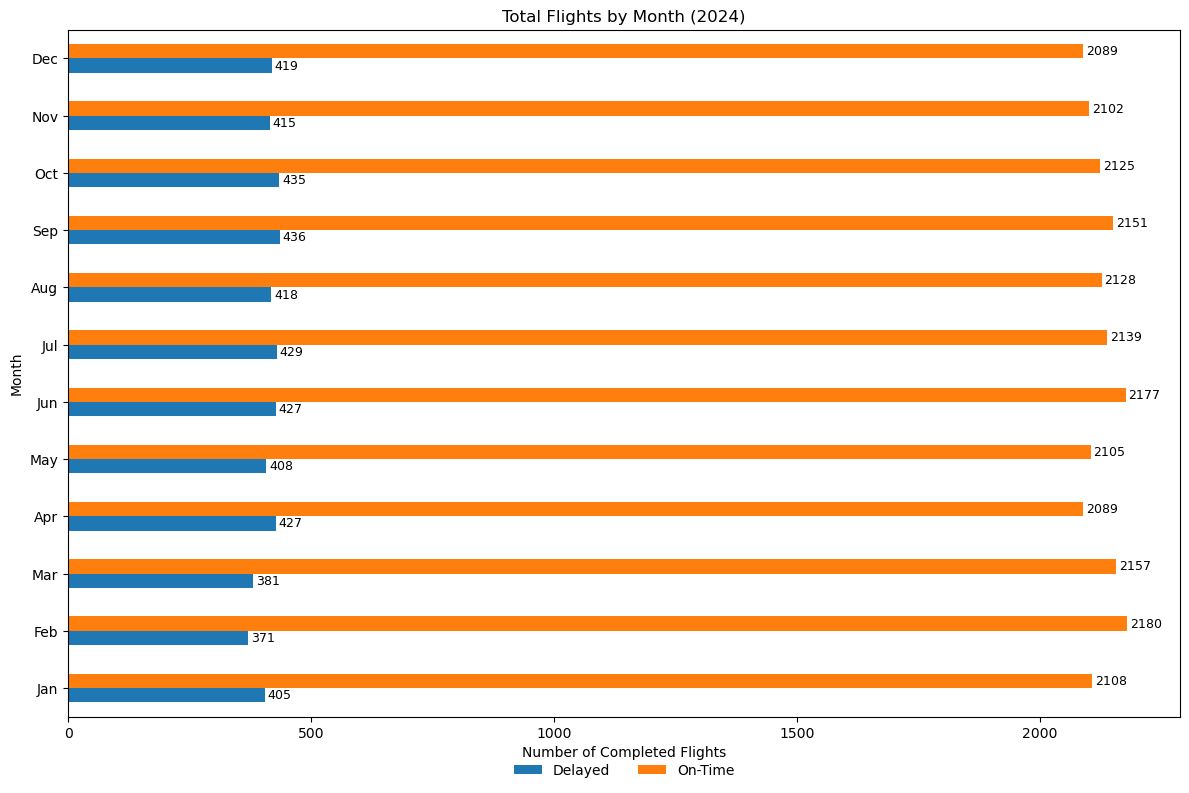

In [40]:
# of Flights by Month_Year

# Create month name & number
df["Month_Name"] = df["Date"].dt.strftime("%b")   # Jan, Feb, ...
df["Month_Num"] = df["Date"].dt.month             # 1–12

# Subset of the data
filtered = df[df['Status'].isin(['Delayed', 'On-Time'])]

# Group by Month_Name (sorted using Month_Num)
total_flights = (
    filtered.groupby(['Month_Num','Month_Name','Status'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
    .sort_values("Month_Num")
)

# Drop Month_Num (only used for sorting)
total_flights = total_flights.drop(columns="Month_Num")

# Plot bar chart
ax = total_flights.plot(
    x='Month_Name', kind='barh', figsize=(12, 8)
)

plt.title("Total Flights by Month (2024)")
plt.xlabel("Number of Completed Flights")
plt.ylabel("Month")

# Add values on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=2, fontsize=9, color="black")

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),   # position below the plot
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()

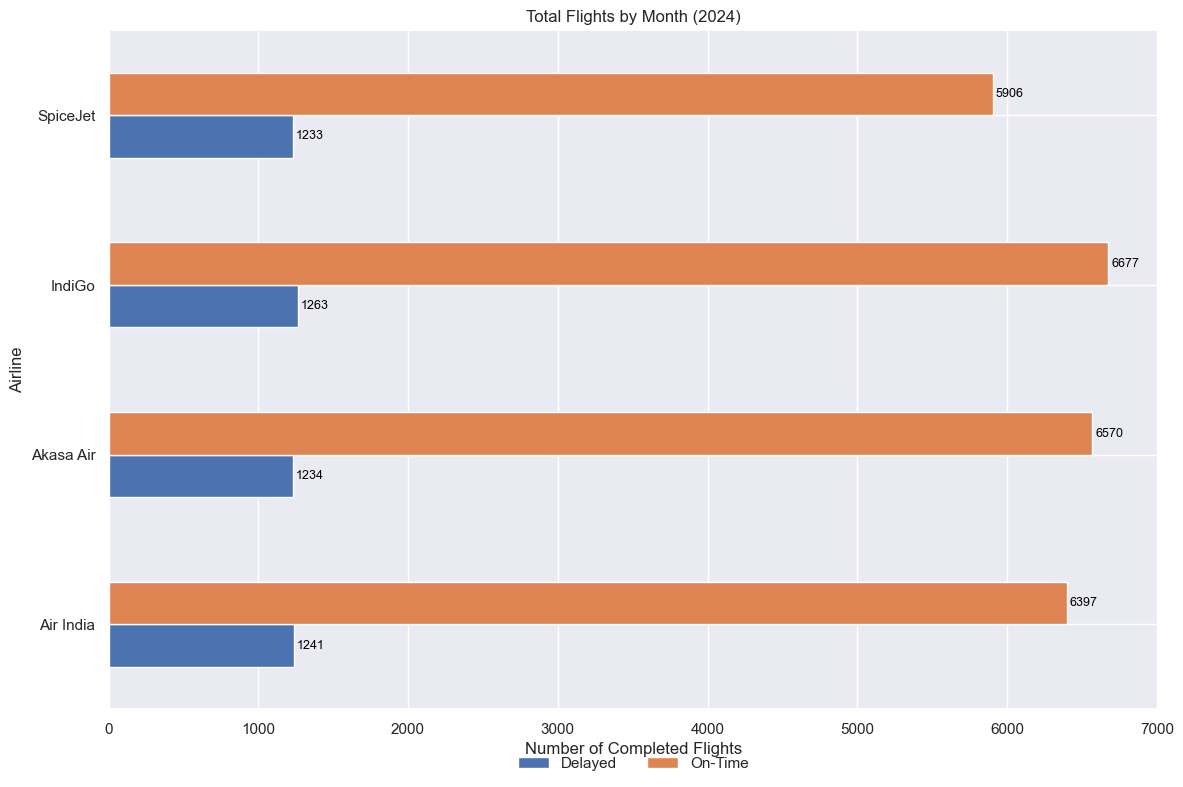

In [100]:
# of Flights by Airline

# Group by Month_Name (sorted using Month_Num)
Airline_flights = (
    filtered.groupby(['Airline','Status'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
    .sort_values("Airline")
)


# Plot bar chart
ax = Airline_flights.plot(
    x='Airline', kind='barh', figsize=(12, 8)
)

plt.title("Total Flights by Month (2024)")
plt.xlabel("Number of Completed Flights")
plt.ylabel("Airline")

# Add values on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=2, fontsize=9, color="black")

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),   # position below the plot
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.show()

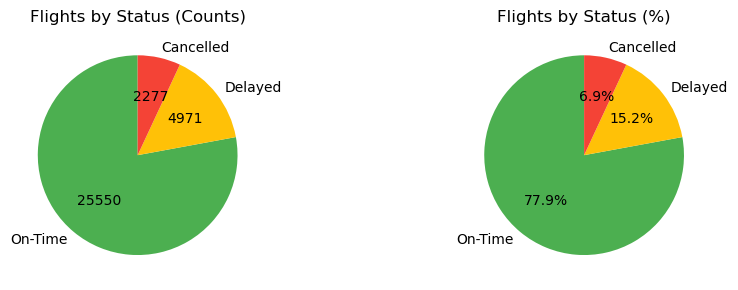

In [55]:
# Overall Cancelled / Delayed / Ontime flights %

status_c = df['Status'].value_counts()

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes = axes.flatten()

# --- Pie chart 1: Counts ---
axes[0].pie(
    status_c,
    labels=status_c.index,
    startangle=90,
    colors=['#4CAF50', '#FFC107', '#F44336'],
    autopct=lambda p: f'{int(round(p*sum(status_c)/100.0))}' if p > 0 else ''
)
axes[0].set_title("Flights by Status (Counts)")

# --- Pie chart 2: Percentages ---
axes[1].pie(
    status_c,
    labels=status_c.index,
    startangle=90,
    colors=['#4CAF50', '#FFC107', '#F44336'],
    autopct='%1.1f%%'
)
axes[1].set_title("Flights by Status (%)")

plt.tight_layout()
plt.show()


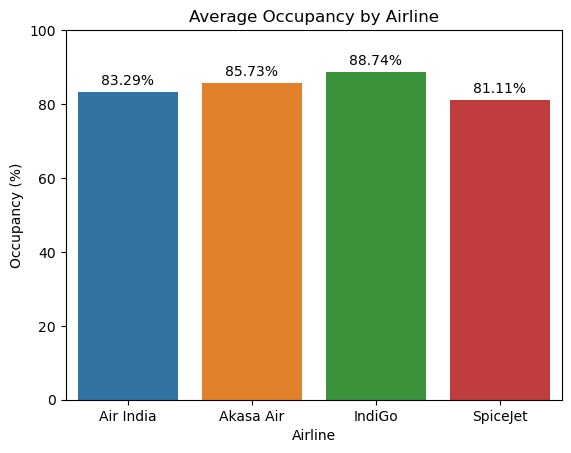

In [60]:
# comparing occupance

occupy=df.groupby(['Airline'], as_index=False)['Occupancy'].mean()

# Bar plot
ax = sns.barplot(x='Airline', y='Occupancy', data=occupy)

# Add % values on top of bars
for p in ax.patches:
    value = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,   # x position
        value + 1,                        # y position just above bar
        f"{value:.2f}%",                  # format as percentage
        ha='center', va='bottom',
        fontsize=10, color='black'
    )

plt.title("Average Occupancy by Airline")
plt.ylabel("Occupancy (%)")
plt.xlabel("Airline")
plt.ylim(0, 100)  # keep within 0–100 since it's percentage

plt.show()

### Presenting the KPI Metrics - By Airlines


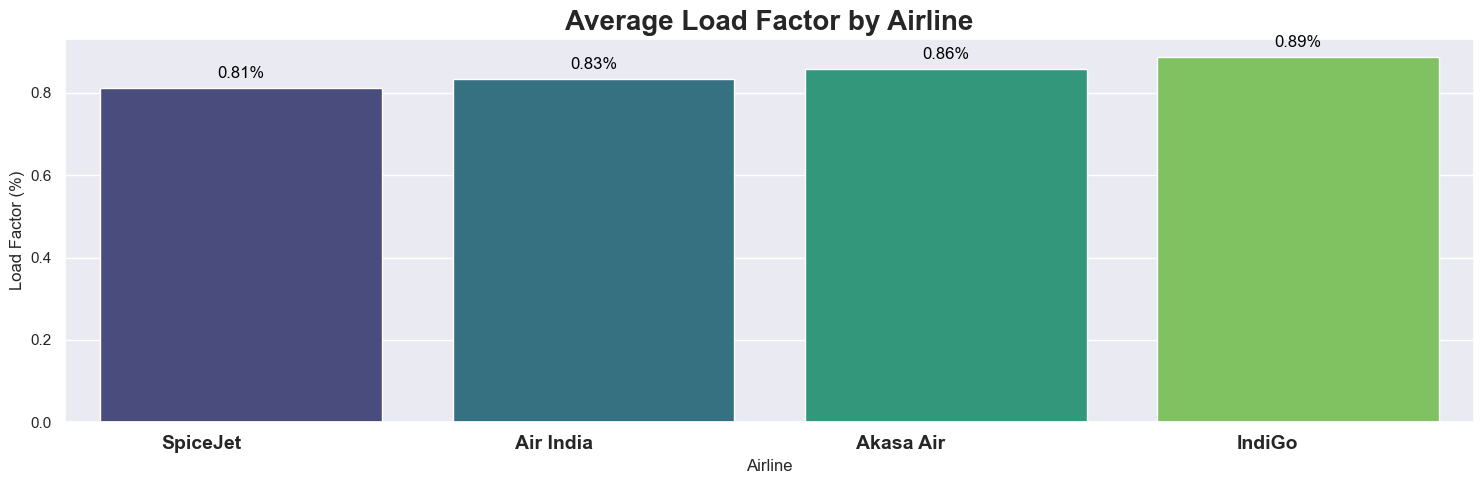

In [89]:
# Plotting theaverage load factor by the airlines
sns.set(rc={'figure.figsize': (15, 5)})
ax = sns.barplot(x='Airline', y='Load_Factor', data=load_f, palette="viridis")

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5, fontsize=12, color='black')

# Titles and labels
plt.title("Average Load Factor by Airline", fontsize=20, fontweight="bold")
plt.xlabel("Airline")
plt.ylabel("Load Factor (%)")
plt.xticks(rotation=0, ha="right", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

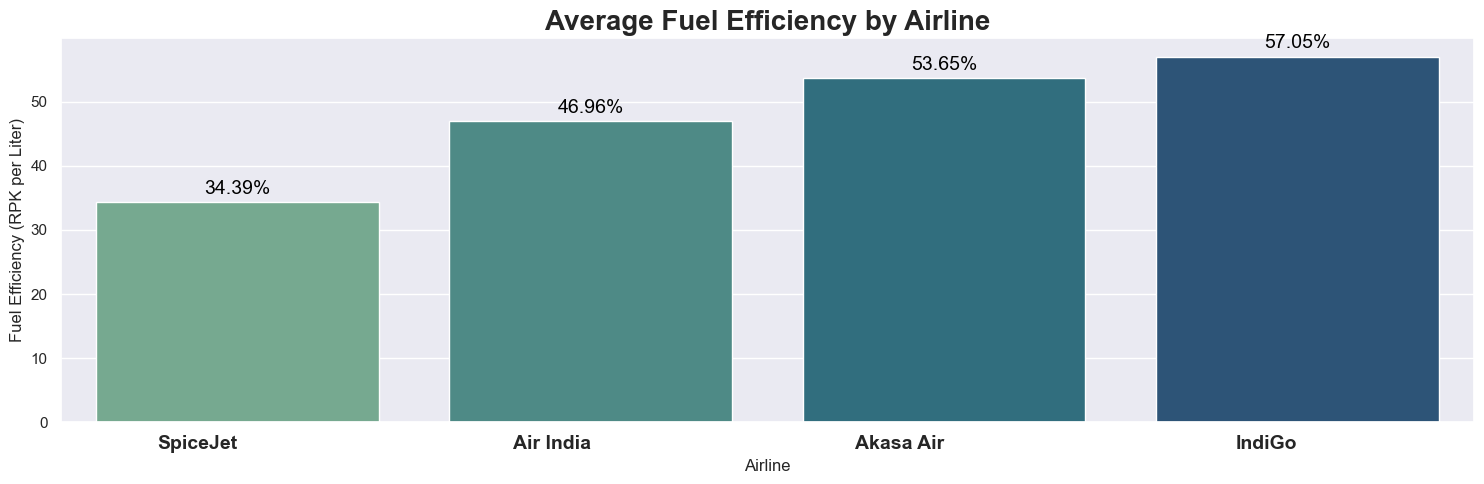

In [88]:
# Group and sort by Fuel Efficiency
fuel_eff = df.groupby(['Airline'], as_index=False)['Fuel_Efficiency'].mean().sort_values('Fuel_Efficiency')

# Plot
sns.set(rc={'figure.figsize': (15, 5)})
ax = sns.barplot(x='Airline', y='Fuel_Efficiency', data=fuel_eff, palette="crest")

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3, fontsize=14, color='black')

# Titles and labels
plt.title("Average Fuel Efficiency by Airline", fontsize=20, fontweight="bold")
plt.xlabel("Airline")
plt.ylabel("Fuel Efficiency (RPK per Liter)")
plt.xticks(rotation=0, ha="right", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

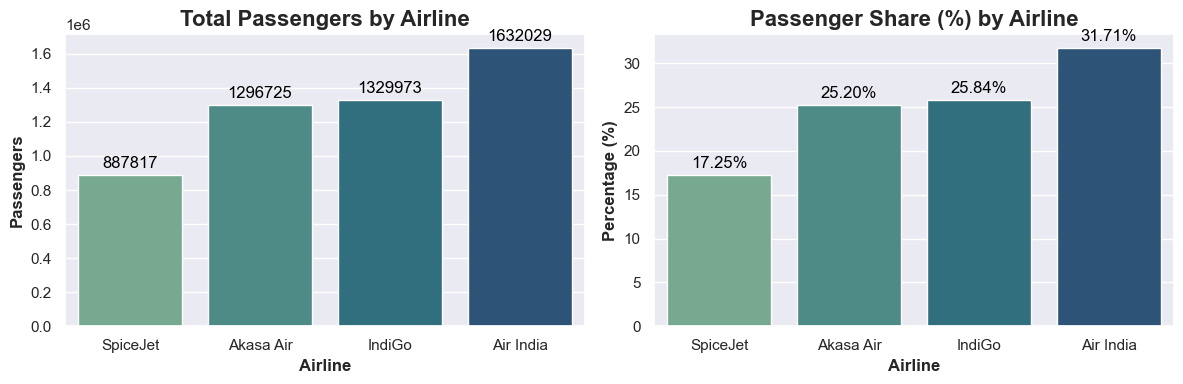

In [99]:
# Total and Average number of passengers by Airlines

pass_c = df.groupby(['Airline'], as_index=False)['Passengers'].sum().sort_values('Passengers')
pass_c['Pct'] = (pass_c['Passengers'] / pass_c['Passengers'].sum()) * 100

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes = axes.flatten()

# Plot
ax1 = sns.barplot(x='Airline', y='Passengers', data=pass_c, palette="crest", ax=axes[0])
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', padding=3, fontsize=12, color='black')

ax1.set_title("Total Passengers by Airline", fontsize=16, fontweight="bold")
ax1.set_xlabel("Airline", fontsize=12, fontweight="bold")
ax1.set_ylabel("Passengers", fontsize=12, fontweight="bold")
ax1.tick_params(axis='x', rotation=0)

ax2 = sns.barplot(x='Airline', y='Pct', data=pass_c, palette="crest", ax=axes[1])
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f%%', padding=3, fontsize=12, color='black')

ax2.set_title("Passenger Share (%) by Airline", fontsize=16, fontweight="bold")
ax2.set_xlabel("Airline", fontsize=12, fontweight="bold")
ax2.set_ylabel("Percentage (%)", fontsize=12, fontweight="bold")
ax2.tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.show()



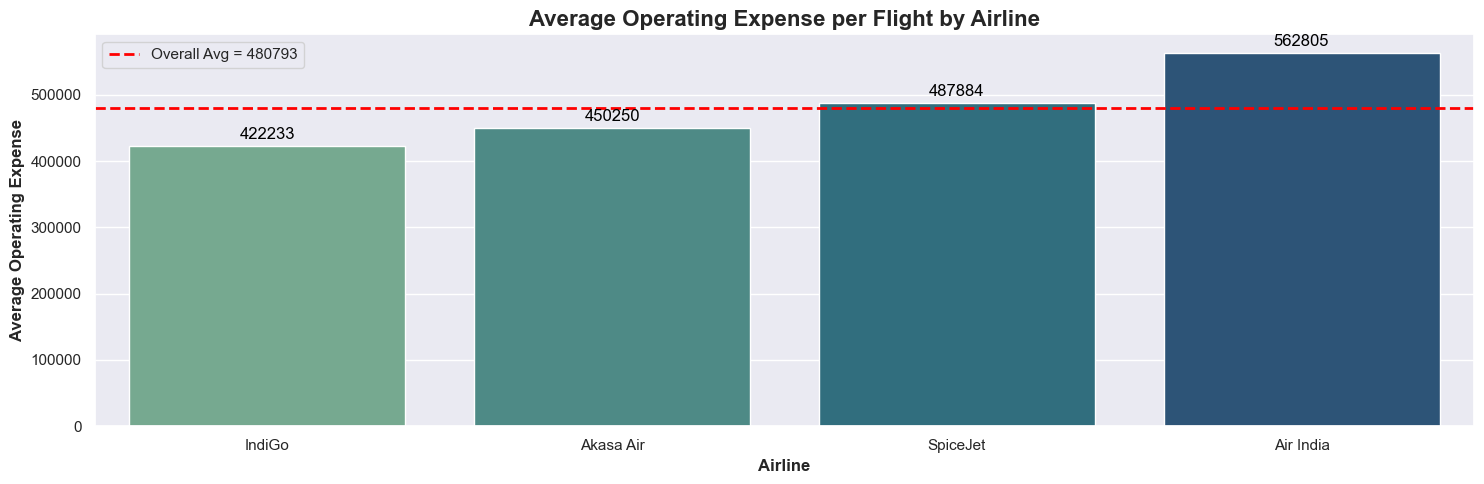

In [104]:
# Calculate average expense per flight for each airline
avg_expenses = df.groupby('Airline', as_index=False)['Operating_Expense'].mean().sort_values('Operating_Expense')

# Calculate overall average expense across all airlines
overall_avg = df['Operating_Expense'].mean()

# Plot bar chart
sns.set(rc={'figure.figsize': (15, 5)})
ax = sns.barplot(x='Airline', y='Operating_Expense', data=avg_expenses, palette="crest")

# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=12, color='black')

# Add horizontal line for overall average
plt.axhline(overall_avg, color='red', linestyle='--', linewidth=2, label=f'Overall Avg = {overall_avg:.0f}')

# Titles and labels
plt.title("Average Operating Expense per Flight by Airline", fontsize=16, fontweight="bold")
plt.xlabel("Airline", fontsize=12, fontweight="bold")
plt.ylabel("Average Operating Expense", fontsize=12, fontweight="bold")
plt.legend()

plt.tight_layout()
plt.show()

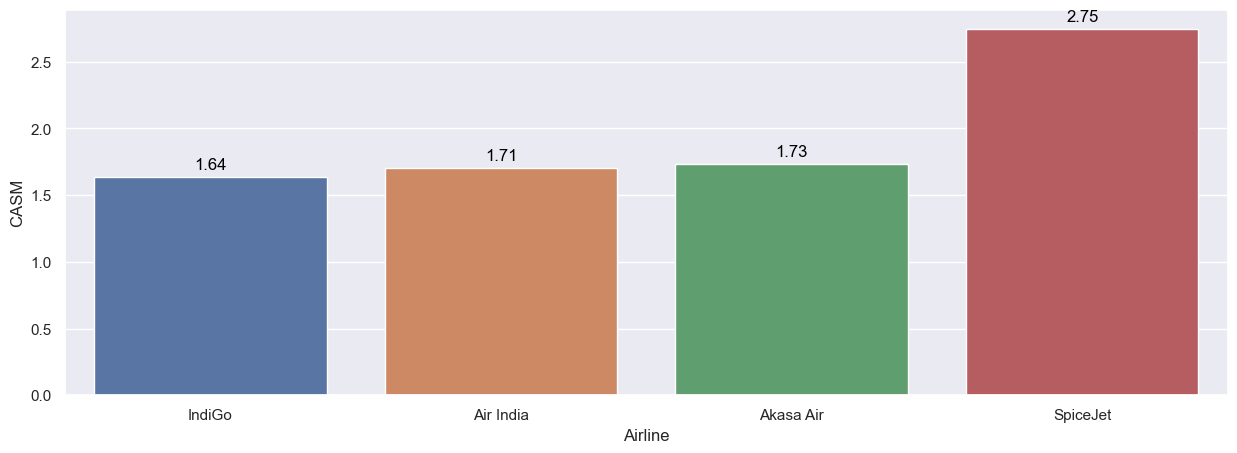

In [111]:
# Calcuate Cost per Available Seat Mile for each airline

df['Seat_Miles']=df['Available_Seats']*df['Distance_KM']
df['CASM']=df['Operating_Expense']/df['Seat_Miles']

casm=df.groupby('Airline', as_index=False)['CASM'].mean().sort_values('CASM')

sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(x='Airline',y='CASM',data=casm)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=12, color="black")

In [165]:
loc_flights = (
    df.groupby(['Departure_City'])
    .size()
    .reset_index(name='Flights')
    .sort_values("Flights",ascending=False)
)

print(f"The airport with most number of flights:\n\n{loc_flights.head(1).to_string(index=False)}")

The airport with most number of flights:

Departure_City  Flights
         Delhi    14060


In [155]:
# Details of the departures from each city

pivot_table = loc_flights.pivot_table(
    index='Airline',
    columns='Departure_City',
    values='Flights',   # any column with unique records per flight
    aggfunc='sum',
    fill_value=0
)

print(pivot_table)

Departure_City  Bengaluru  Chennai  Delhi  Mumbai
Airline                                          
Air India            2335     1163   3516    1178
Akasa Air            2367     1166   3507    1159
IndiGo               2359     1167   3491    1174
SpiceJet             2344     1189   3546    1137
